In [1]:
#!pip install numpy matplotlib scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft,ifft,fftfreq

In [3]:
help(wavfile)

Help on module scipy.io.wavfile in scipy.io:

NAME
    scipy.io.wavfile - Module to read / write wav files using NumPy arrays

DESCRIPTION
    Functions
    ---------
    `read`: Return the sample rate (in samples/sec) and data from a WAV file.

    `write`: Write a NumPy array as a WAV file.

CLASSES
    builtins.UserWarning(builtins.Warning)
        WavFileWarning

    class WavFileWarning(builtins.UserWarning)
     |  Method resolution order:
     |      WavFileWarning
     |      builtins.UserWarning
     |      builtins.Warning
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |
     |  Data descriptors defined here:
     |
     |  __weakref__
     |      list of weak references to the object
     |
     |  ----------------------------------------------------------------------
     |  Methods inherited from builtins.UserWarning:
     |
     |  __init__(self, /, *args, **kwargs)
     |      Initialize self.  See help(type(self)) for 

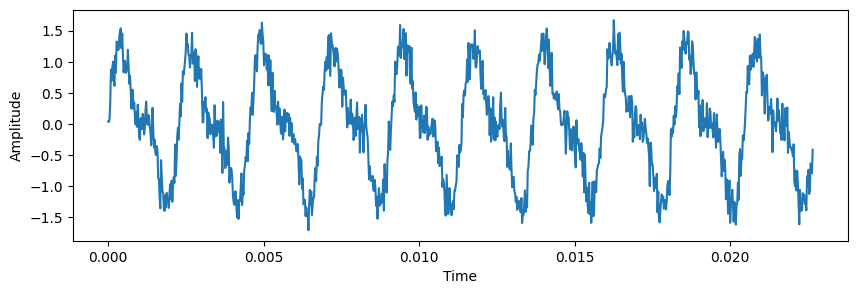

In [9]:
#GENERATING A NOICY WAVE

fs=44100
t=np.linspace(0,1,fs,endpoint=False)

x=np.sin(2*np.pi*440*t)+0.5*np.sin(2*np.pi*880*t)+0.2*np.random.randn(len(t))

plt.figure(figsize=(10,3))
plt.plot(t[:1000],x[:1000])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

Text(0, 0.5, 'Amplitude')

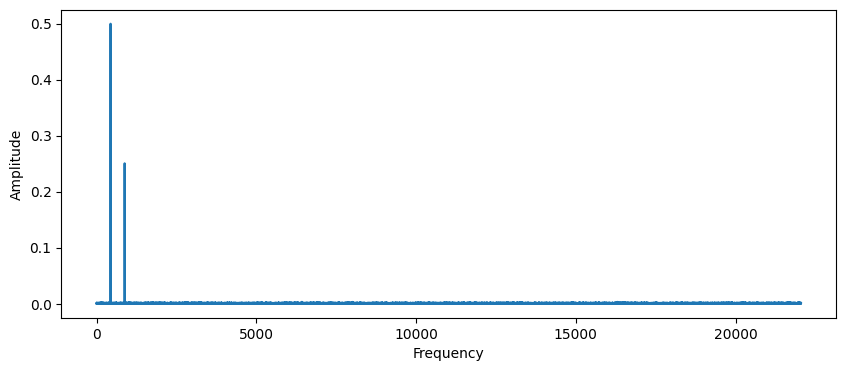

In [10]:
X=fft(x)
N=len(X)
freqs=fftfreq(N,1/fs)

mask=freqs >=0
plt.figure(figsize=(10,4))
plt.plot(freqs[mask],np.abs(X[mask])/N)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

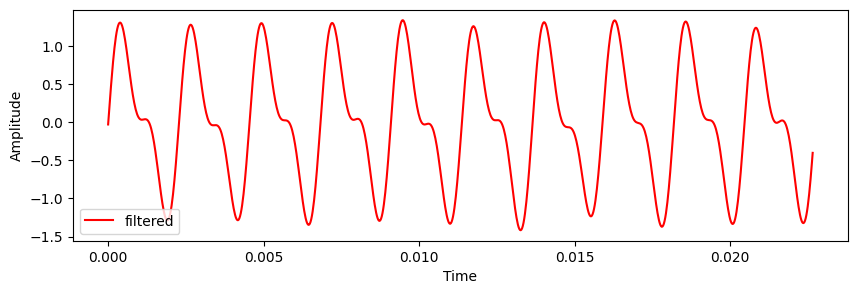

In [11]:
X_filt=X.copy()
X_filt[np.abs(freqs)>1000]=0

x_filt=np.real(ifft(X_filt))

plt.figure(figsize=(10,3))
#plt.plot(t[:1000],x[:1000], label='noicy')
plt.plot(t[:1000],x_filt[:1000], label='filtered',color='r')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')


In [7]:
from scipy.io.wavfile import write
write('filtered.wav',fs,x_filt.astype(np.float32))

In [8]:
from scipy.io.wavfile import write
write('unfiltered.wav',fs,x.astype(np.float32))